# CSE353 Homework 2
**Due date: 11:59pm on December 02, 2024**

In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Description
---
This project is an introduction to deep learning tools for Natural Language Processing. You will experiment and train Transformer-based networks for text classification using [PyTorch](http://pytorch.org). Specifically, in this assignment, you’ll dive into the world of transformer-based models for natural language processing (NLP), with a special focus on BERT (Bidirectional Encoder Representations from Transformers). BERT, along with other transformers, has fundamentally changed how machines process language.

We’ll start by exploring word embeddings. You’ll learn how BERT generates “contextualized” embeddings, meaning the same word—like “bank”—can have different vector representations depending on its context. For example, “bank” can refer to a financial institution or the side of a river, and BERT captures these differences. Your first task will be to load a pre-trained BERT model, extract embeddings for words, and see how these embeddings change with context. This part will help you understand why transformers are such a big deal in NLP.

Next, you’ll put BERT to work in a text classification task, training a model to classify text into categories. Using PyTorch and the Hugging Face library, you’ll fine-tune BERT to recognize patterns in the data and make predictions. This is where you’ll really see how transformers can power real-world applications. By the end of this assignment, you are expected to have a solid grasp of how to use BERT for NLP tasks and be ready to tackle more advanced deep learning projects.

## Some Tutorials (PyTorch)
---
- You will be using PyTorch for deep learning toolbox (follow the [link](http://pytorch.org) for installation).
- For PyTorch beginners, please read this [tutorial](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) before doing your homework.
- Feel free to study more tutorials at http://pytorch.org/tutorials/.
- Find cool visualization here at http://playground.tensorflow.org.




In [ ]:
!pip install -q datasets
!pip install numpy
!pip install pandas
!pip install torch
!pip install matplotlib
!pip install -U scikit-learn
!pip install transformers

In [ ]:
import numpy as np
import warnings
import pandas as pd
import torch
from datasets import load_dataset
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

## Introduction to Transformers.

Transformers are a groundbreaking neural network architecture that has transformed the field of Natural Language Processing (NLP). They are the underlying technology behing ChatGPT, GPT4, Gemini and other well-known Large Language models that most of us use quite a lot. But let's start from the basics.

At the heart of NLP, the first challenge is to represent words in a way that machines can understand. This is done using word embeddings, which are numerical representations of words in a continuous vector space. In simpler terms, they convert words into dense vectors that capture their meanings. The key innovation of Transformers is that they generate contextualized embeddings, meaning that the same word can have different meanings based on the sentence it appears in. This allows the model to better grasp nuances, like homonyms or polysemous words, and it gives rise to models that understand language in a way that feels intuitive and almost human-like.

Therefore, let's first explore how what word embeddings are and how they work. We will be using BERT, one of the most used Language Models which really set the pace for the uprise of the newer groundbreaking LLMs.

Throughout this assignment, we will be using PyTorch and HuggingFace, which are two important ML frameworks.

In [ ]:
# Import torch --> the PyTorch library
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

###**Problem 1:** Extract and visualize word embeddings with BERT [40/100 points]

### Extract single word embedding

Now that we loaded our model, let's use it in order to extract word embeddings.

In [ ]:
# Tokenize input text
text = "bank"
word_to_extract = "bank"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Get the position of the word we're interested in
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
word_index = tokens.index(word_to_extract)

# Pass tokens through BERT
with torch.no_grad():
    outputs = model(**inputs)

# Extract embeddings
embeddings = outputs.last_hidden_state  # Embeddings for each token

# Print embeddings shape
print("Embeddings shape:", embeddings.shape)  # Example shape: (1, num_tokens, hidden_size)

# Now let's isolate the word embedding for the word bank
bank_emb = embeddings[0][word_index]

print("Word embedding for the single word bank:", bank_emb)

Embeddings shape: torch.Size([1, 3, 768])
Word embedding for the single word bank: tensor([-3.4963e-01, -7.3440e-01, -5.8732e-01, -6.1737e-01,  5.2172e-01,
         6.8754e-01,  1.3395e-01,  9.0185e-01, -5.1010e-01, -6.2614e-01,
         1.4078e-02,  8.2674e-02,  4.1525e-01,  3.1088e-01, -7.9199e-01,
        -4.8141e-01,  4.8469e-01,  6.4897e-02,  1.0234e+00, -3.5507e-02,
        -4.5187e-01,  4.1955e-01,  5.0114e-01, -4.4830e-01, -9.2895e-02,
         7.0261e-01,  4.2115e-02,  2.9413e-01, -9.1645e-02,  3.4879e-01,
         1.8220e-01,  2.1599e-01,  5.4102e-01,  3.5400e-01, -5.4799e-01,
        -1.0385e+00, -1.7001e-01,  9.6542e-02, -6.3357e-01,  5.4143e-01,
         2.3745e-01, -7.2238e-01,  3.8040e-01, -1.2271e-01,  4.6272e-01,
        -6.8366e-02,  4.8680e-01,  5.5842e-01, -1.2060e+00,  1.6398e-01,
        -2.4939e-01,  7.4053e-01,  1.8472e-01, -2.2565e-02,  2.9800e-02,
        -4.2158e-02,  6.2196e-01,  2.4044e-01, -8.3352e-01, -2.8973e-01,
         7.7549e-01, -8.3799e-02,  6.1320

### Problem 1.1: Extract contextualized word embeddings [10 points]

What Are Contextualized Word Embeddings?

Unlike traditional word embeddings like Word2Vec or GloVe, which give a fixed vector representation for a word regardless of context, contextualized word embeddings are dynamic. In models like BERT, the same word can have different meanings depending on the surrounding words, and its embedding will reflect this.

For example, the word bank can refer to a financial institution in one sentence or the side of a river in another. BERT takes into account the entire sentence when generating the embedding for bank, allowing it to capture the specific meaning based on the context.

In this task, you’ll extract and visualize the embeddings for the word bank in various sentences to see how its representation changes depending on the context.

In [ ]:
def extract_word_embeddings_from_sentence(sentence, word_to_extract):

      # Tokenize input text
      inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)

      # Get the position of the word we're interested in
      tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
      word_index = tokens.index(word_to_extract)

      # Pass tokens through BERT
      with torch.no_grad():
          outputs = model(**inputs)

      # Extract embeddings
      embeddings = outputs.last_hidden_state  # Embeddings for each token

      context_bank_emb = None # store the word embeddings for the target word in this variable

      ##### ---------- INSERT YOUR CODE HERE ---------- #####

      context_bank_emb = embeddings[0][word_index]



      ##### ---------- END CODE HERE ---------- #####

      return context_bank_emb

In [ ]:
context_bank_emb = extract_word_embeddings_from_sentence("The local bank approved the loan.", "bank")

print(context_bank_emb.shape) # If the code that you completed is correct, the output of this command should be: torch.Size([768])
print(context_bank_emb)

torch.Size([768])
tensor([ 3.9973e-01, -2.6108e-01, -3.5468e-01,  2.8025e-01,  1.1342e+00,
         2.7441e-01, -7.5463e-01,  6.8329e-01,  3.6226e-01,  1.9091e-02,
         1.0049e-01, -4.2025e-01,  3.0898e-01,  1.4186e-01, -6.4435e-01,
         1.2720e-01,  2.5645e-01,  7.1529e-01,  6.0978e-01,  2.8755e-01,
        -2.2998e-01,  1.2590e-01,  3.6411e-01,  4.6092e-01,  1.4862e-01,
         2.1506e-01,  4.5253e-01,  7.9881e-01, -2.0808e-01, -1.5427e-01,
         6.1394e-01,  9.1024e-01,  2.6142e-02,  2.2617e-01,  9.4530e-02,
         7.0062e-02, -2.7300e-02, -1.8833e-01, -1.1544e+00,  4.4221e-01,
        -2.6135e-01, -6.8278e-01, -5.8174e-01,  7.8444e-01, -7.0938e-01,
        -4.5243e-01, -1.7614e-01,  3.1539e-01, -2.9757e-01, -8.0405e-01,
        -3.5972e-01,  9.7657e-01,  4.4274e-01, -5.4916e-01,  4.2320e-02,
         5.1594e-01, -6.7635e-01, -5.9293e-01, -3.0064e-02, -4.8220e-01,
         6.2881e-01,  3.4256e-01,  7.4228e-01, -8.6559e-01, -9.7830e-02,
        -3.8727e-01,  2.5238e-02,

Both `bank_emb` and `context_bank_emb` are word embeddings for the word *bank*. However, if you take a closer look to the two embedding vectors, they must significantly different. *If not, please check your code again.*





### Problem 1.2: Visualizing Contextualized Word Embeddings with PCA [20 points]

In this part of the assignment, we’ll visualize how BERT generates different embeddings for the same word depending on the context it’s used in. We’ll focus on the word bank, which can have different meanings based on the sentence.

We’ll first extract embeddings for the word bank in three different scenarios:

*   Without any context: The word bank by itself.
*   In a financial context: The sentence “The local bank approved the loan.”
*   In a nature context: The sentence “The fisherman sat by the river bank.”


By passing these sentences through a pre-trained BERT model, we’ll retrieve embeddings for each word in the sentence. These embeddings are high-dimensional vectors (768 dimensions) that capture the meaning of each word, including how it relates to other words in the sentence.

2.	Dimensionality Reduction with PCA:

Since it’s difficult to visualize embeddings in 768 dimensions, we’ll use Principal Component Analysis (PCA) to reduce the dimensionality of the embeddings to 2D space. This allows us to plot the embeddings and visually compare them.

3.	Visualization:

We’ll then plot the word embeddings in different colors:
*  Blue for the word bank without any context.
*  Green for the sentence “The local bank approved the loan.”
*  Red for the sentence “The fisherman sat by the river bank.”

In [ ]:
# Function to extract embeddings for all words in the sentence
def get_all_word_embeddings(sentence):
    """Get BERT embeddings for all words in a given sentence."""
    # Tokenize input text
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)

    # Pass tokens through BERT
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the embeddings for all tokens (ignore [CLS] and [SEP] tokens)
    embeddings = outputs.last_hidden_state[:, 1:-1, :]  # Exclude [CLS] and [SEP]

    # Convert to numpy and return embeddings and tokens
    return embeddings.squeeze(0).numpy(), tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][1:-1])

In [ ]:
# Visualization function
def visualize_word_embeddings_with_pca(sentences, colors):
    """Visualize word embeddings using PCA for multiple sentences."""
    all_embeddings, all_tokens = [], []

    # Extract embeddings and tokens for each sentence
    for sentence in sentences:
        embeddings, tokens = get_all_word_embeddings(sentence)
        all_embeddings.append(embeddings)
        all_tokens.append(tokens)

    # Flatten the embeddings and apply PCA
    flattened_embeddings = torch.tensor([embedding for sentence_embeddings in all_embeddings for embedding in sentence_embeddings]).numpy()

    # Perform PCA to reduce dimensionality to 2D
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(flattened_embeddings)

    plt.figure(figsize=(8, 8))

    # Keep track of the offset to handle tokens from multiple sentences
    offset = 0
    for sentence_tokens, color in zip(all_tokens, colors):
        for i, token in enumerate(sentence_tokens):
            # Plot each token's reduced embedding in the 2D space
            plt.scatter(reduced_embeddings[offset + i, 0], reduced_embeddings[offset + i, 1], color=color)
            plt.text(reduced_embeddings[offset + i, 0] + 0.01, reduced_embeddings[offset + i, 1], token, fontsize=12, color=color)

        # Update offset to handle the next sentence's embeddings
        offset += len(sentence_tokens)

    # Customize plot appearance
    plt.title("PCA Visualization of Word Embeddings for Sentences")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

<ipython-input-10-79457fe9f600>:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  flattened_embeddings = torch.tensor([embedding for sentence_embeddings in all_embeddings for embedding in sentence_embeddings]).numpy()


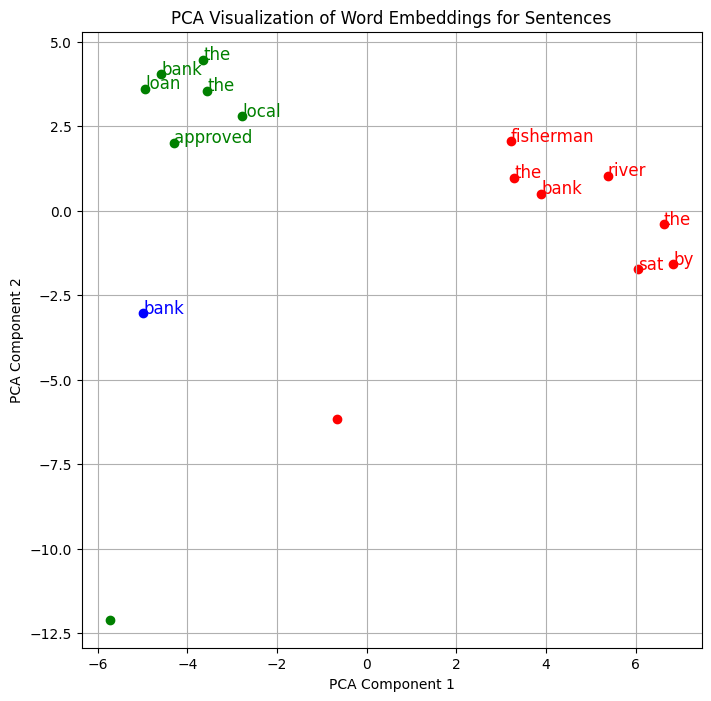

In [ ]:
# Example sentences
sentences = [
    "bank",
    "The local bank approved the loan.",
    "The fisherman sat by the river bank."
]

# Define colors for each sentence
colors = ['blue', 'green', 'red']

# Visualize the embeddings using PCA
visualize_word_embeddings_with_pca(sentences, colors)

By plotting these points, we observe how BERT places the word bank in different locations in the embedding space based on its surrounding context. Words that are used in similar contexts (such as loan and bank in the financial sentence) are closer together in the 2D space, while the word bank in the nature context should appear further from the financial context. Moreover, the representation of the word bank when there is no context is also far from both the financial and the nature context of the same word.

### A. Exploring Contextualized Word Embeddings with a New Word (10/20 points)

Now that you have observed how the word bank changes its meaning based on context using BERT’s contextualized embeddings, it’s time to extend this idea to another word.

Your task is to choose a different word that has multiple meanings depending on the context.

Once you’ve chosen your word, write two sentences that clearly demonstrate its different meanings in different contexts. Then, using the same approach we applied to the word *bank*, extract and visualize the word embeddings for each sentence as well as the word standalone. This will allow you to observe how BERT adjusts the word’s representation depending on the surrounding text.

Note: Use the `visualize_word_embeddings_with_pca` function which can be found above.

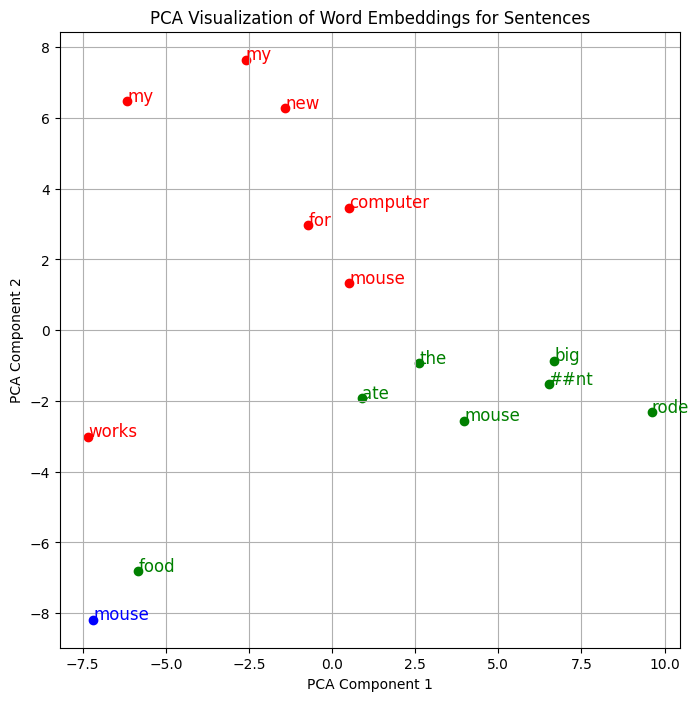

In [ ]:
##### ---------- INSERT YOUR CODE HERE ---------- #####
# Example sentences
sentences = [
    "mouse",
    "The big rodent mouse ate food",
    "My new mouse for my computer works"
]


# Visualize the embeddings using PCA
visualize_word_embeddings_with_pca(sentences, colors)


##### ---------- END CODE HERE ---------- #####

### B. Observing Contextual Similarity (10/20 points)

In the following visualization, you can see that the words “discussion” and "debate" are positioned far apart in the 2D space, reflecting their different meanings when viewed in isolation.

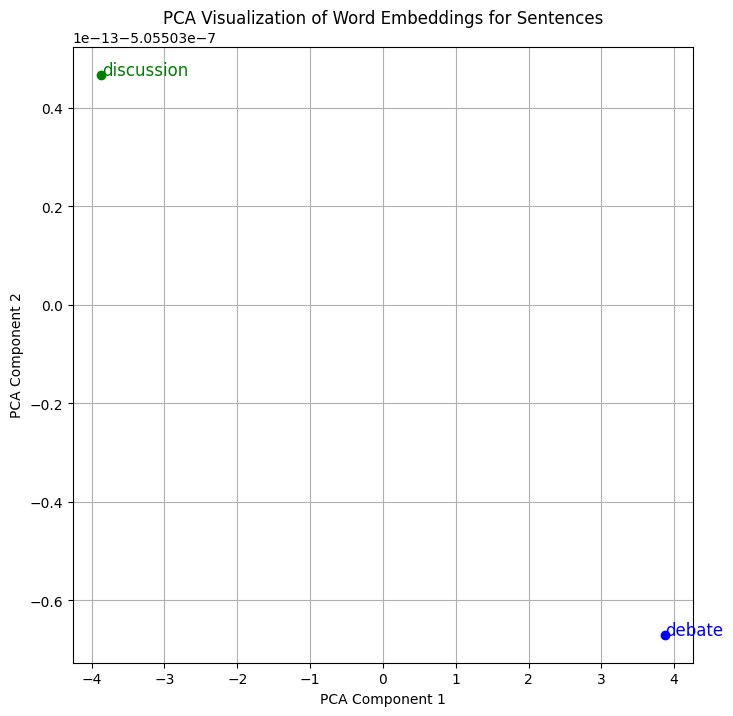

In [ ]:
sentences = ["debate", "discussion"]
colors = ['blue', 'green']

# Visualize the embeddings using PCA
visualize_word_embeddings_with_pca(sentences, colors)

However, when words are used together in a specific context, BERT adjusts their embeddings, and words that are closely related in meaning or function should fall closer to each other in the 2D space.

Your task now is to explore this phenomenon. Use the words “discussion” and "debate" in two different sentences where their relationship is clear.

Once you’ve written your sentences, extract and visualize the embeddings for the words of the sentences using BERT. Comment on the visualized diagram. Are the embeddings for “discussion” and debate closer to each other in the 2D space when used in the context that you chose? If not, what do you think that went wrong? **Fill in your thoughts in the text cell below.**

*Note: There is not a single correct or wrong answer in this question. We want to see your thoughts on the visualized plot, as well as the reasons behind why you chose these two sentences. As long as your answer is justified and reasons on what happened on the plot, it should be more than fine.*

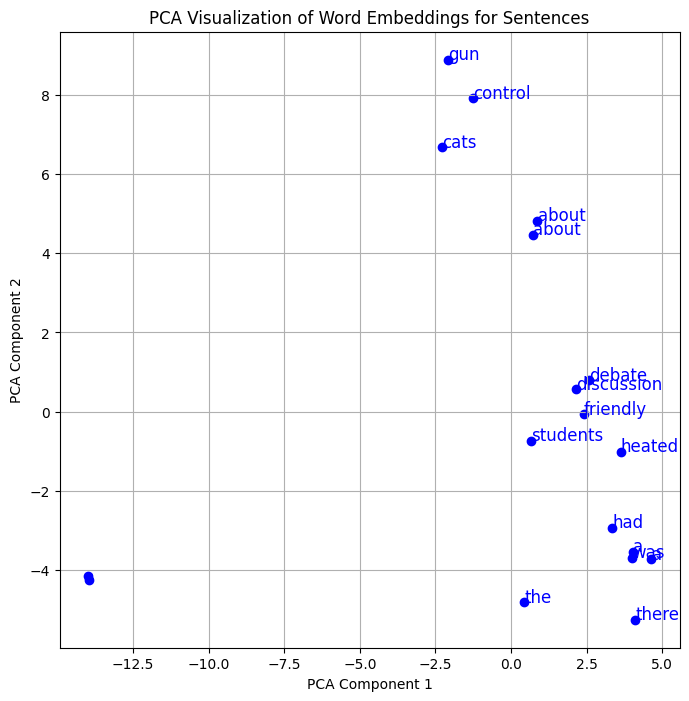

In [ ]:
##### ---------- FILL IN THE SENTENCES IN THE LIST BELOW ---------- #####

sentences = [
    "The students had a friendly discussion about cats."
    "There was a heated debate about gun control."
]


##### ---------- END OF YOUR CODE ---------- #####


# Define colors for each sentence
colors = ['blue', 'green']

# Visualize the embeddings using PCA
visualize_word_embeddings_with_pca(sentences, colors)


##**ANSWER HERE:**
In the above plot, I observe that all the words are colored blue. Another observation is that debate and discussion are right next to each other. I think this is because in the context of these sentence they are kind of the same word.

## Part 2: Text classification using BERT [60/100 points]
In the second part of this assignment, you will explore one of the most powerful applications of BERT: text classification. BERT has proven to be highly effective in understanding the context of words and sentences, making it a strong model for tasks like sentiment analysis, topic classification, and more.

Your task is to fine-tune a pre-trained BERT model for a text classification problem. You will use BERT’s contextualized embeddings and attention mechanisms to classify text into predefined categories.

In this part, you will:

	1.	Prepare your dataset for text classification.
	2.	Fine-tune BERT on the dataset.
	3.	Evaluate the model’s performance using accuracy, precision, recall, and other relevant metrics.

By the end of this section, you should understand how to adapt BERT for specific tasks and observe its ability to generalize to new text data.

## Problem 2.1. Load Dataset [15 points]

Let's first load our dataset. The dataset that we will work with is the [AG News Dataset](https://https://paperswithcode.com/dataset/ag-news). It contains news articles from 4 large categories. The goal is to classify each article into one of the four categories using a language model.

```
1.	World
2.	Sports
3.	Business
4.	Science/Technology
```

We will load the dataset using [HuggingFace's Datasets](https://huggingface.co/docs/datasets/index) library.



In [ ]:
from datasets import load_dataset
import random
# Load the dataset through the HuggingFace library
dataset = load_dataset("ag_news")

"""
Let's promptly explore the dataset.
It is divided into two subsets; train and test.
Each subset contains thousands of training and test examples respectively.
"""
print("-"*100)
print(f"The structure of the dataset looks like:\n{dataset}")
print("-"*100)

# Let's now sample a random element from the train dataset
print("Train example:", dataset["train"][random.randint(0, len(dataset["train"]))])

print("-"*100)

"""
We can see that each example contains a text and a label.
The text will be the input of our model, while the label is the target output.
"""
idx = random.randint(0, len(dataset["test"]))
print("Random test text:", dataset["test"][idx]["text"])
print("Random test text:", dataset["test"][idx]["label"])

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

----------------------------------------------------------------------------------------------------
The structure of the dataset looks like:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})
----------------------------------------------------------------------------------------------------
Train example: {'text': 'Toll Brothers #39; profit soars 56 HUNTINGDON VALLEY, Pa. (Dow Jones/AP) -- Toll Brothers Inc. Wednesday said profit for its latest quarter surged 56 percent as demand for new luxury homes remained strong.', 'label': 2}
----------------------------------------------------------------------------------------------------
Random test text: Shanghai Readies for Rockets-Kings Game (AP) AP - Built in the days of Mao Zedong's 1966-76 Cultural Revolution, Shanghai's rundown city gymnasium is getting the full NBA treatment for next month's e

Your first task is to split the provided dataset into three subsets: a training set, a validation set, and a test set. Specifically, your goal is to:

	•	Create a training set with 800 examples.
	•	Create a validation set with 400 examples.
	•	Create a test set with 500 examples.

For the training set, make sure to have a balanced distribution across the different classes to ensure the model learns equally from all categories. Once you have completed the splits, return two lists for each subset: one for the input data (train_x, val_x, test_x) and one for the labels (train_y, val_y, test_y). Complete the function below under the `##### ---------- INSERT YOUR CODE HERE ---------- #####` message.

 This will prepare the data for fine-tuning the BERT model.

In [ ]:
"""
    Load the dataset.
    For each subset, return two lists
"""
from sklearn.model_selection import train_test_split


def train_val_test_split(dataset):

  ##### ---------- INSERT YOUR CODE HERE ---------- #####

  train_size = 1200
  train_data = dataset["train"].shuffle(seed=42) # randomize
  train_subset = train_data.select(range(train_size)) # get the subset

  # get the labels
  X = [entry["text"] for entry in train_subset]
  y = [entry["label"] for entry in train_subset]

  # do train_test_split for validationa and training
  train_x, val_x, train_y, val_y = train_test_split(X, y, train_size=800, test_size=400, random_state=42, shuffle=True
                                                    )
  test_size = 500
  test_data = dataset["test"].shuffle(seed=42) #randomize
  test_subset = test_data.select(range(test_size)) #get subset for train
  # get the labels
  test_x = [entry["text"] for entry in test_subset]
  test_y = [entry["label"] for entry in test_subset]

  return train_x, train_y, val_x, val_y, test_x, test_y

  ##### ---------- END CODE HERE ---------- #####


train_x, train_y, val_x, val_y, test_x, test_y = train_val_test_split(dataset)

### Defining seed and DataLoader

In this task, you will use a DataLoader to feed your data to the BERT model during training and evaluation. The DataLoader helps to handle large datasets efficiently by loading the data in mini-batches, shuffling it, and handling the batching process.

To achieve this, we have defined a custom dataset class called AGNewsDataset. This class inherits from torch.utils.data.Dataset, which is the standard way to represent datasets in PyTorch. The AGNewsDataset class works as follows:

	•	__init__ method: Initializes the dataset by storing the input encodings and labels.
	•	__getitem__ method: Retrieves a single item (input and label) by index. It converts each feature and label into a tensor, which is the format required by PyTorch.
	•	__len__ method: Returns the total number of examples in the dataset.

Once the dataset is initialized, the DataLoader will use it to:

	1.	Efficiently load the data in mini-batches.
	2.	Shuffle the data during training for better generalization.
	3.	Automatically create batches to send to the model for training.

This setup allows BERT to process the dataset in small, manageable chunks, which is especially important when working with large models and datasets.

In [ ]:
"""
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
"""

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [ ]:
# Disable all warnings
warnings.filterwarnings('ignore')

# Set the seed
set_seed(1)

class AGNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

###Tokenizing and Preparing the Dataset for BERT

Before feeding the text data into BERT, we need to tokenize it. Tokenization is the process of converting the raw text into a format that BERT can understand: a series of tokens (numerical representations of words and subwords). In this block of code, you will:

- Tokenize the training, validation, and test datasets using the tokenizer function from the pre-trained BERT model. You will apply:
- Truncation: Ensures that any text longer than the max_length is cut off to fit the required input size.
- Padding: Adds padding to the shorter sentences so they all have the same length.
- max_length: This limits the maximum number of tokens that BERT will process from each input.

Once tokenized, we will bring the data into the format required for BERT:

	•	We create custom datasets using the AGNewsDataset class defined earlier. This takes the tokenized encodings and corresponding labels (train_y, dev_y, and test_y) and formats them for training and evaluation.

This step prepares the data to be passed into the BERT model for text classification, ensuring that it is in the right structure and format for efficient processing.

In [ ]:
# Tokenize the dataset at max_length, using truncation and padding
train_encodings = tokenizer(train_x, truncation=True, padding=True, max_length=256)
valid_encodings = tokenizer(val_x, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(test_x, truncation=True, padding=True, max_length=256)

# And bring it into the desired format for applying classification with BERT
train_dataset = AGNewsDataset(train_encodings, train_y)
validation_dataset = AGNewsDataset(valid_encodings, val_y)
test_dataset = AGNewsDataset(test_encodings, test_y)

In this step, you will load a pre-trained BERT model that is specifically designed for sequence classification tasks. BERT can be fine-tuned for various tasks, and for text classification, we use the BertForSequenceClassification model, which is tailored to classify entire sequences (sentences or documents) into predefined categories.

In [ ]:
# Load a BERT model for text classification
target_list = ["World", "Sports", "Business", "Sci/Tech"]

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(target_list)
).to("cuda")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###Understanding BERT’s Architecture

Now that we’ve loaded the BERT model, let’s briefly look at its core components:

1. Embeddings Layer

- word_embeddings: Maps each token in the vocabulary to a 768-dimensional vector.
- position_embeddings: Adds positional information to tokens to understand word order.
- token_type_embeddings: Helps distinguish between pairs of sentences in tasks like question answering.

2. Encoder Layer

The encoder is the heart of BERT, consisting of 12 layers of self-attention and feed-forward networks. These layers allow BERT to learn relationships between all words in a sentence, capturing both local and global context. At a high level, the encoder:

- Uses self-attention to help each word attend to every other word in the sequence.
- Applies feed-forward layers to transform and refine the learned representations.

3. Pooler Layer

Focuses on the special [CLS] token to summarize the sentence. This pooled output is passed to the classifier.

4. Classifier

The final layer maps BERT’s output to the number of target categories (4 in this case: “World,” “Sports,” “Business,” “Sci/Tech”) to make predictions.


In [ ]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

### Defining the Training Arguments

In this block, we define the training arguments that will control how the BERT model is fine-tuned. The TrainingArguments class provides several options to customize the training process:

	•	output_dir: Directory to save model checkpoints and results.
	•	num_train_epochs: The number of times the model will pass over the entire training dataset (2 epochs in this case).
	•	per_device_train_batch_size: The number of training examples processed at once by each device (set to 16).
	•	per_device_eval_batch_size: The batch size for evaluation (set to 20).
	•	warmup_steps: Number of steps to perform learning rate warm-up, which helps the model gradually adjust to the task.
	•	weight_decay: Applies a regularization term to prevent overfitting (set to 0.01).
	•	logging_dir: Directory to save training logs.
	•	load_best_model_at_end: Ensures that the best-performing model on the validation set is loaded at the end of training.
	•	logging_steps: Logs model training progress every 50 steps.
	•	evaluation_strategy: Specifies when to evaluate the model during training (in this case, it evaluates the model after a certain number of steps).

These parameters allow you to configure and fine-tune BERT effectively for the task.

In [ ]:
# Training arguments specification

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=20,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    report_to="none"
)

To train the BERT model, we will use Hugging Face’s Trainer module, which simplifies the training loop by handling many of the complexities involved. Here’s how it works:

	•	model: The BERT model that we loaded and configured for sequence classification.
	•	args: The training arguments you defined earlier (training_args) to control the training process.
	•	train_dataset: The dataset used for training.
	•	eval_dataset: The dataset used for evaluation during training.

By using the Trainer, you can efficiently train and evaluate BERT without needing to manually write the training loop, making the process more streamlined.

### Problem 2.2: Evaluate the model's performance. [20 points]

In this task, you will implement the compute_metrics function, which is responsible for evaluating the performance of your BERT model. Specifically, you need to calculate and return the precision, recall, and F1-score for each of the four classes in the dataset.

Your goal is to:

- Calculate the accuracy of the model.
- For each class, compute the precision (the ability of the model to correctly identify positive samples), recall (the ability to find all relevant instances), and the F1-score (the harmonic mean of precision and recall).

You are allowed to use any of the sklearn.metrics functions imported below, as well as other libraries of your choice.

This will give you a detailed view of how the model performs for each class and help you understand the model’s strengths and weaknesses across different categories. Once you’ve completed the function, it will be used by the Trainer to evaluate the model during training and validation.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """Computes accuracy and per-class precision, recall, and F1 score."""
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)

    return {
        'accuracy': acc,
        'precision_class_0': precision[0],
        'recall_class_0': recall[0],
        'f1_class_0': f1[0],
        'precision_class_1': precision[1],
        'recall_class_1': recall[1],
        'f1_class_1': f1[1],
        'precision_class_2': precision[2],
        'recall_class_2': recall[2],
        'f1_class_2': f1[2],
        'precision_class_3': precision[3],
        'recall_class_3': recall[3],
        'f1_class_3': f1[3],
    }

In [ ]:
# Trainer specification

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision Class 0,Recall Class 0,F1 Class 0,Precision Class 1,Recall Class 1,F1 Class 1,Precision Class 2,Recall Class 2,F1 Class 2,Precision Class 3,Recall Class 3,F1 Class 3
1,1.371500,1.345643,0.370000,0.383648,0.628866,0.476562,0.615385,0.074074,0.132231,0.384615,0.113636,0.175439,0.341584,0.644860,0.446602
2,1.296100,1.263248,0.512500,0.630435,0.597938,0.613757,0.892857,0.231481,0.367647,0.433628,0.556818,0.487562,0.437126,0.682243,0.532847
3,1.185400,1.113454,0.710000,0.664000,0.855670,0.747748,0.957143,0.620370,0.752809,0.652174,0.681818,0.666667,0.654867,0.691589,0.672727
4,0.988500,0.845154,0.862500,0.800000,0.865979,0.831683,0.943396,0.925926,0.934579,0.879518,0.829545,0.853801,0.830189,0.822430,0.826291
5,0.722400,0.588531,0.887500,0.873684,0.855670,0.864583,0.929204,0.972222,0.950226,0.924051,0.829545,0.874251,0.831858,0.878505,0.854545


TrainOutput(global_step=250, training_loss=1.1127844390869142, metrics={'train_runtime': 234.5041, 'train_samples_per_second': 17.057, 'train_steps_per_second': 1.066, 'total_flos': 396729262176000.0, 'train_loss': 1.1127844390869142, 'epoch': 5.0})

After successfully training and evaluating your BERT model, it’s important to save the fine-tuned model and tokenizer for future use. This allows you to reuse the model for inference or further training without having to retrain it from scratch.

In [ ]:
# Save the fine-tuned model and the tokenizer
model_path = "ag_news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('ag_news-bert-base-uncased/tokenizer_config.json',
 'ag_news-bert-base-uncased/special_tokens_map.json',
 'ag_news-bert-base-uncased/vocab.txt',
 'ag_news-bert-base-uncased/added_tokens.json')

### Problem 2.3: Evaluating Model Performance on the Test Set and Generate Confusion Matrix [10 points]

Now that your BERT model is trained, it’s time to assess its performance on the test set, which contains unseen data. In this task, we will:

- Make predictions on the test set using your trained model.
- Evaluate the test accuracy to see how well the model generalizes to new data.
- Generate a confusion matrix to visualize the performance across different classes.

The confusion matrix provides a detailed view of how the model performs for each class, showing where it makes correct predictions and where it confuses certain classes. Each row represents the true class, while each column represents the predicted class. Values along the diagonal represent correct predictions, while off-diagonal values indicate misclassifications.

The code that generates the confusion matrix is given. Please observe the confusion matrix and comment on your observations in the markdown cell below:

Test Accuracy: 83.40%


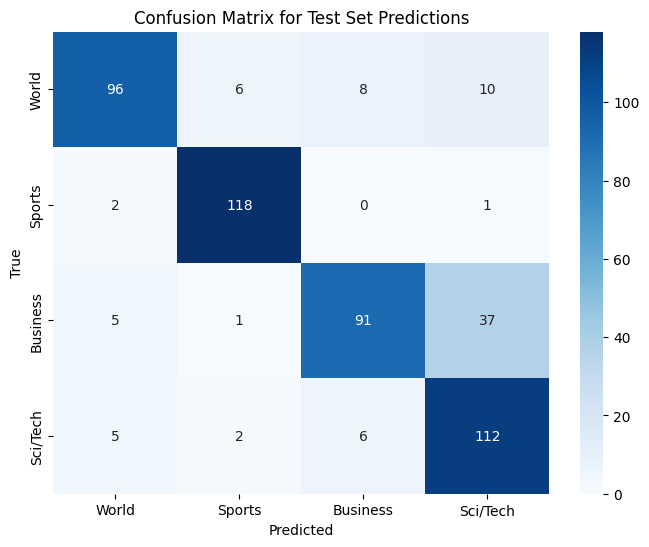

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
test_results = trainer.predict(test_dataset)

# Get predictions and true labels
test_preds = test_results.predictions.argmax(-1)
test_labels = test_results.label_ids

# Calculate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate a confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_list, yticklabels=target_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set Predictions')
plt.show()

###Comment on the confusion matrix below:

##### ---------- INSERT YOUR COMMENTS BELOW ---------- #####

The fine tuned model did a very great job on classification. The confusion matrix shows that the model was able to thrive in classifying Sci/Tech and Sports articles. However the model had a hard time classifying Business as it classified 37 Business articles as Sci/Tech.

The class that was labeled the most by the model was Sci/Tech, 10 were classified that when it was actually world, and 37 when it was actually Business. Seems like the model liked to classify articles as Sci/Tech. Overall performance of the model is really well and able to classify majority of the articles correctly.




##### ---------- END OF COMMENTS ---------- #####

### Modifying the Classification Head with an MLP [Extra 10 points]

In this final task, you will modify the classification head of the BERT model by defining it as a multi-layer perceptron (MLP) using nn.Sequential. This approach allows you to create a more complex classification head with multiple layers, dropout, and activation functions, in a structured and concise way. After making these modifications, you will retrain the model using the Trainer framework, as you did earlier.

Your task:

- Modify the classification head to include multiple layers using [nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).
- Re-train the model using the provided code with Hugging Face’s Trainer framework.
- Evaluate the model and compare the performance of the modified model with the original one.

By experimenting with the structure of the classification head, you can explore how these architectural changes impact the performance of the model.

Feel free to also experiment with the model's hyperparameters (see TrainingArguments). The goal is to beat the previous model's performance.

In [ ]:
import torch.nn as nn
# Create an instance of the modified model
modified_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(target_list)
).to("cuda")

modified_model.classifier = nn.Sequential(
    ### ------ INSERT YOUR CODE HERE ------ ###

    nn.Linear(768, 512),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(256, len(target_list))


    ### ------ END OF CODE ------ ###
)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Create an instance of the modified model
# Define the training arguments (same as before)
training_args = TrainingArguments(
    output_dir='./results_modified',
    num_train_epochs=5,
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=20,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_modified',
    load_best_model_at_end=True,
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    report_to="none"
)

# Define the Trainer using the modified model
trainer = Trainer(
    model=modified_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics,
)

# Train the modified model
trainer.train()

# Evaluate the modified model
trainer.evaluate()

Epoch,Training Loss,Validation Loss,Accuracy,Precision Class 0,Recall Class 0,F1 Class 0,Precision Class 1,Recall Class 1,F1 Class 1,Precision Class 2,Recall Class 2,F1 Class 2,Precision Class 3,Recall Class 3,F1 Class 3
1,1.385500,1.378124,0.250000,0.244949,1.000000,0.393509,0.000000,0.000000,0.000000,0.750000,0.034091,0.065217,0.000000,0.000000,0.000000
2,1.323300,1.206112,0.650000,0.750000,0.742268,0.746114,0.850000,0.944444,0.894737,0.464481,0.965909,0.627306,1.000000,0.009346,0.018519
3,1.070300,0.884765,0.705000,0.927711,0.793814,0.855556,0.920354,0.962963,0.941176,0.470270,0.988636,0.637363,0.736842,0.130841,0.222222
4,0.716800,0.547445,0.890000,0.893617,0.865979,0.879581,0.945455,0.962963,0.954128,0.805825,0.943182,0.869110,0.913978,0.794393,0.850000
5,0.429900,0.423011,0.897500,0.974684,0.793814,0.875000,0.929204,0.972222,0.950226,0.800000,0.954545,0.870466,0.902913,0.869159,0.885714


{'eval_loss': 0.42301109433174133,
 'eval_accuracy': 0.8975,
 'eval_precision_class_0': 0.9746835443037974,
 'eval_recall_class_0': 0.7938144329896907,
 'eval_f1_class_0': 0.875,
 'eval_precision_class_1': 0.9292035398230089,
 'eval_recall_class_1': 0.9722222222222222,
 'eval_f1_class_1': 0.9502262443438914,
 'eval_precision_class_2': 0.8,
 'eval_recall_class_2': 0.9545454545454546,
 'eval_f1_class_2': 0.8704663212435233,
 'eval_precision_class_3': 0.9029126213592233,
 'eval_recall_class_3': 0.8691588785046729,
 'eval_f1_class_3': 0.8857142857142857,
 'eval_runtime': 4.3513,
 'eval_samples_per_second': 91.927,
 'eval_steps_per_second': 4.596,
 'epoch': 5.0}

Test Accuracy: 87.80%


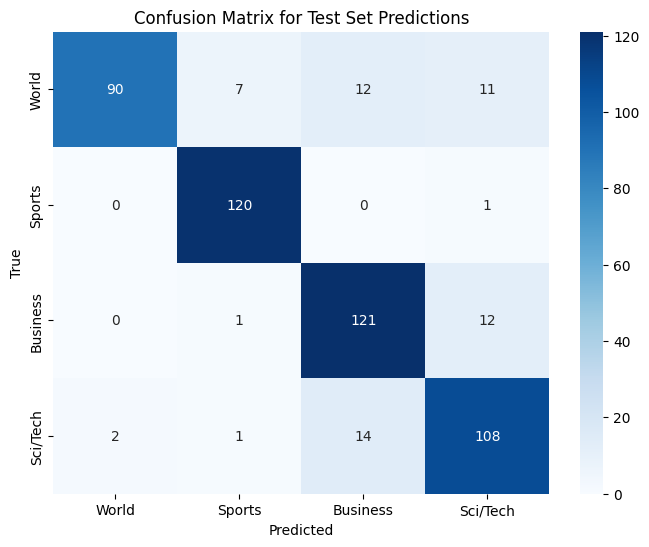

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
test_results_new = trainer.predict(test_dataset)

# Get predictions and true labels
test_preds_new = test_results_new.predictions.argmax(-1)
test_labels_new = test_results_new.label_ids

# Calculate accuracy on the test set
test_accuracy_new = accuracy_score(test_labels_new, test_preds_new)
print(f"Test Accuracy: {test_accuracy_new * 100:.2f}%")

# Generate a confusion matrix
conf_matrix_new = confusion_matrix(test_labels_new, test_preds_new)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_new, annot=True, fmt='d', cmap='Blues', xticklabels=target_list, yticklabels=target_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set Predictions')
plt.show()

## Submission guidelines
---
Download the .ipynb file to a folder of your preference. All you need to do is to fill in the blanks as indicated.

When submitting your .zip file through brightspace, please
-- name your .zip file as **Surname_Givenname_SBUID_hw2.zip**.

This zip file should include:
```
Surname_Givenname_SBUID_hw2
        |---Surname_Givenname_SBUID_hw2.ipynb
        |---Surname_Givenname_SBUID_hw2.pdf
```

For instance, student Bill Gates should submit a zip file named "Gates_Bill_111134567_hw2.zip" for homework2 in this structure:
```
Gates_Bill_111134567_hw2
        |---Gates_Bill_111134567_hw2.ipynb
        |---Gates_Bill_111134567_hw2.pdf
```

The **Surname_Givenname_SBUID_hw*.pdf** should only include a **google shared link**. To generate the **google shared link**, first create a folder named **Surname_Givenname_SBUID_hw*** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter TA's emails: **pkaliosis@cs.stonybrook.edu**. Make sure that TA ***Panagiotis Kaliosis*** has the link and **can edit**, ***not just*** **view**, and also **uncheck** the **Notify people** box.

Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in blackboard is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in blackboard.

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be delays in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues. Also feel free to drop by the TAs office hours.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.